# Data Preparation

## Importing Packages

In [ ]:
# Importing the Libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression, Lasso, Ridge

import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [ ]:
# Read the Breast Cancer Dataset

data = pd.read_csv('breast_cancer.csv')

In [ ]:
# Explore the dataset

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Cleaning the Dataset

In [ ]:
# Checking for missing values 

data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Dropping the ID Column 

data = data.drop(['id'], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check for duplicates 

data.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [ ]:
# Use Label Encoder to encode the diagnosis 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Counting the number of benign and malignant
print(data['diagnosis'].value_counts())

# Transforming the diagnosis column
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Counting the number of 0s and 1s in the diagnosis
print(data['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
# Handling Outliers

with_outliers = []
without_outliers = []

# Calculate the mean and standard deviation for each column
for column in data.columns:
    mean = data[column].mean()
    sd = data[column].std()
    
    # Define the boundaries
    lower_bound = mean - 3*sd
    upper_bound = mean + 3*sd
    
    # Find outliers
    outliers_below = data[column] < lower_bound
    outliers_above = data[column] > upper_bound

    #Replace outliers
   
    with_outliers_count = outliers_below.sum() + outliers_above.sum()
    with_outliers.append(column + " " + str(with_outliers_count))

    data[column][outliers_below] =  mean-3*sd
    data[column][outliers_above] =  mean+3*sd

    without_outliers_count = (data[column] < lower_bound).sum() + (data[column] > upper_bound).sum()
    without_outliers.append(column + " " + str(without_outliers_count))



print("With Outliers: ",with_outliers)
print("Without Outliers: ",without_outliers)

With Outliers:  ['diagnosis 0', 'radius_mean 5', 'texture_mean 4', 'perimeter_mean 7', 'area_mean 8', 'smoothness_mean 5', 'compactness_mean 9', 'concavity_mean 9', 'concave points_mean 6', 'symmetry_mean 5', 'fractal_dimension_mean 7', 'radius_se 7', 'texture_se 9', 'perimeter_se 8', 'area_se 6', 'smoothness_se 7', 'compactness_se 12', 'concavity_se 6', 'concave points_se 6', 'symmetry_se 11', 'fractal_dimension_se 10', 'radius_worst 6', 'texture_worst 4', 'perimeter_worst 6', 'area_worst 10', 'smoothness_worst 3', 'compactness_worst 10', 'concavity_worst 7', 'concave points_worst 0', 'symmetry_worst 9', 'fractal_dimension_worst 9']
Without Outliers:  ['diagnosis 0', 'radius_mean 0', 'texture_mean 0', 'perimeter_mean 0', 'area_mean 0', 'smoothness_mean 0', 'compactness_mean 0', 'concavity_mean 0', 'concave points_mean 0', 'symmetry_mean 0', 'fractal_dimension_mean 0', 'radius_se 0', 'texture_se 0', 'perimeter_se 0', 'area_se 0', 'smoothness_se 0', 'compactness_se 0', 'concavity_se 0',

## Splitting the Dataset

In [ ]:
# Splitting the Dataset into Training Set and Test Set

from sklearn.model_selection import train_test_split 

# Splitting the dataset into dependent and independent variables
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Splitting the dataset into 20% test set and 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [ ]:
# scale the X data using normalization

from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()  

X_train_scaled = min_max.fit_transform(X_train)

X_test_scaled = min_max.fit_transform(X_test)

<hr>

# Decision Trees

## Decision Trees Fitting Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=30, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=7)

random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9122807017543859


## Decision Trees Hyperparameter tuning using K-Fold - RF

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=7)

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')


grid_search.fit(X_train_scaled, y_train)

best_params_rf = grid_search.best_params_
print('Best Parameters:', best_params_rf)

# Evaluate 
best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print('Hyperparameter tuning of the Random Forest model yields test accuracy:', accuracy_rf_tuned)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Hyperparameter tuning of the Random Forest model yields test accuracy: 0.8947368421052632


## Evaluating Model Performance using K-Fold - RF

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=7)

accuracies = cross_val_score(best_rf_model, X_train_scaled, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)

print('CV accuracy scores are', accuracies)
print('CV Mean accuracy scores are', np.mean(accuracies))


CV accuracy scores are [0.97802198 0.97802198 0.97802198 0.94505495 0.94505495]
CV Mean accuracy scores are 0.9648351648351647


## Plot Tree

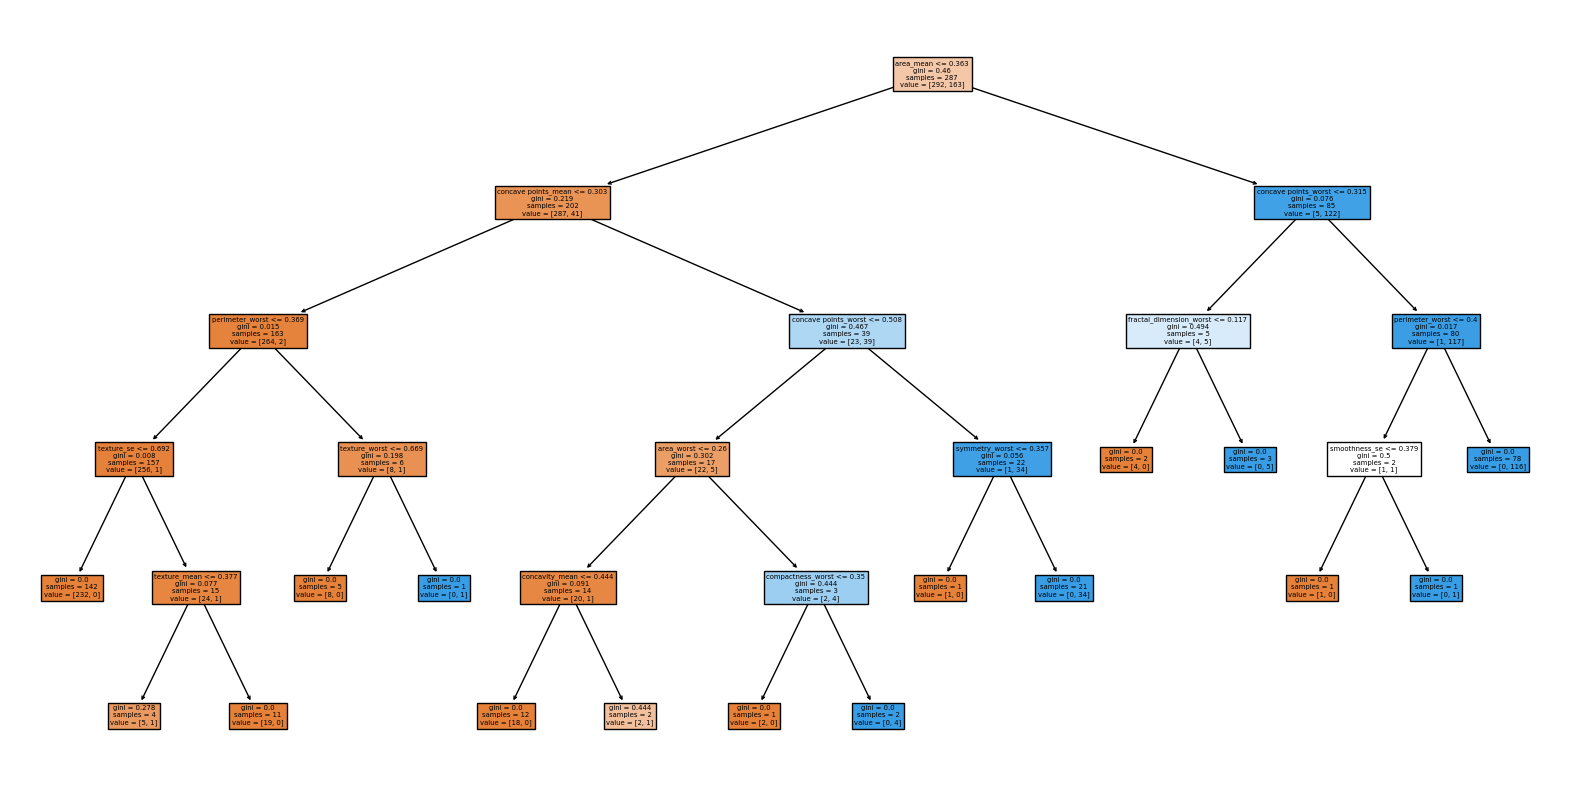

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
 
random_forest = RandomForestClassifier(n_estimators=30, max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=7)


random_forest.fit(X_train_scaled, y_train)

plt.figure(figsize=(20, 10))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=X.columns)
plt.show()


## Feature Importance

Feature Importance:
radius_mean: 0.05523925447259876
texture_mean: 0.005422978294653872
perimeter_mean: 0.10426655751128276
area_mean: 0.11636711400481059
smoothness_mean: 0.00815799949470291
compactness_mean: 0.0020573405808330526
concavity_mean: 0.07990279682545616
concave points_mean: 0.0740186743543607
symmetry_mean: 0.0
fractal_dimension_mean: 0.001394124031147712
radius_se: 0.002158602971834837
texture_se: 0.0006312517767083583
perimeter_se: 0.022675420783932553
area_se: 0.012081720602645042
smoothness_se: 0.0016512319324842007
compactness_se: 0.0016649366096049602
concavity_se: 0.022791661872398287
concave points_se: 0.0005797352033299029
symmetry_se: 0.0018228776567780225
fractal_dimension_se: 0.005489463537931251
radius_worst: 0.17600947276300125
texture_worst: 0.01790631273561668
perimeter_worst: 0.03922404871595087
area_worst: 0.07315472557027199
smoothness_worst: 0.014011205020017794
compactness_worst: 0.01042073462295656
concavity_worst: 0.09833033814378514
concave points_

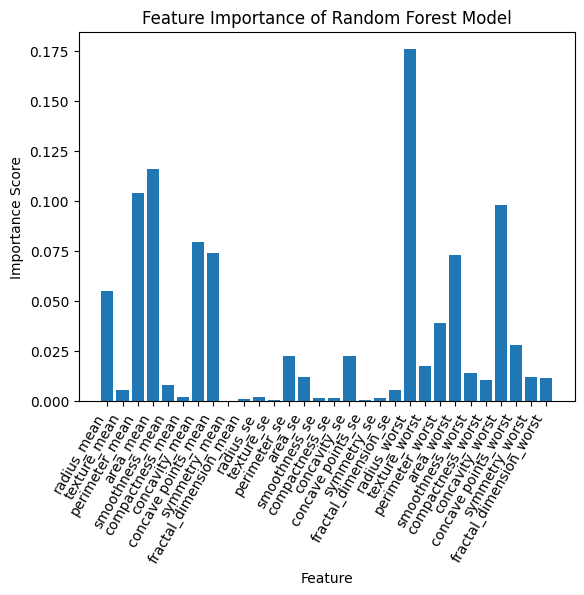

In [ ]:
# Check Feature Importance
fi_rf = random_forest.feature_importances_
importance_dict_rf = dict(zip(X.columns, fi_rf))

print("Feature Importance:")
for feature, importance in importance_dict_rf.items():
    print(f"{feature}: {importance}")

plt.bar(range(len(fi_rf)), fi_rf, tick_label=X.columns)
plt.xlabel('Feature')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Importance Score')
plt.title('Feature Importance of Random Forest Model')
plt.show()


## Confusion Matrix

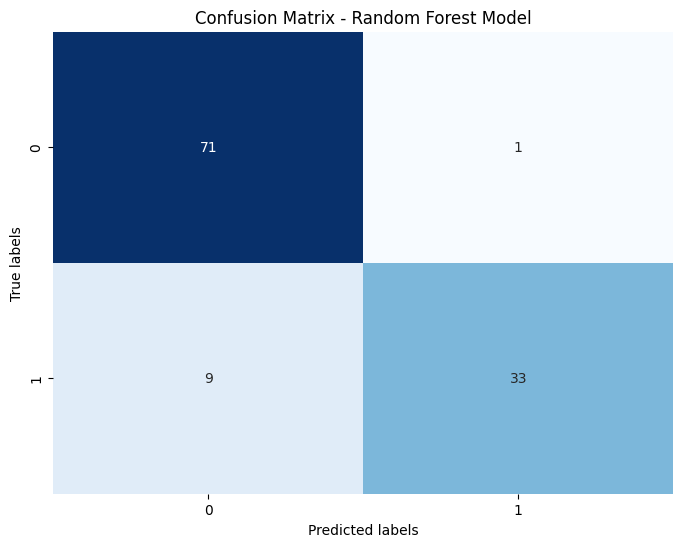

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred_rf = random_forest.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


## Decision Trees Fitting Gradient Boosting Model

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


model_gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.01, max_depth=5, random_state=7)
model_gb.fit(X_train_scaled, y_train)

preds_gb = model_gb.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, preds_gb)
print('Gradient boosting model yields test accuracy:', accuracy_gb)

Gradient boosting model yields test accuracy: 0.9210526315789473


## Decision Trees Hyperparameter tuning using K-Fold - GB

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

gbr = GradientBoostingClassifier(random_state=7)

params = {
    'max_depth': np.arange(5, 30, 5),
    'n_estimators': np.arange(50, 210, 50),
    'learning_rate': np.arange(0.01, 0.31, 0.1)
}

grid_search = GridSearchCV(estimator=gbr, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator and show parameters
best_params_gb = grid_search.best_params_
print('Best Parameters:', best_params_gb)

# Evaluate the tuned model
clf_best_gb = grid_search.best_estimator_
y_test_pred_gb = clf_best_gb.predict(X_test_scaled)

accuracy_tuned_gb = accuracy_score(y_test, y_test_pred_gb)
print('Hyperparameter tuning of the gradient boosting model yields test accuracy:', accuracy_tuned_gb)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 150}
Hyperparameter tuning of the gradient boosting model yields test accuracy: 0.9035087719298246


## Evaluating Model Performance using K-Fold - GB

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

accuracies = cross_val_score(clf_best_gb, X_train_scaled, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)

print('CV accuracy scores are', accuracies)
print('Mean CV accuracy scores are', np.mean(accuracies))


CV accuracy scores are [0.93406593 0.96703297 0.93406593 0.93406593 0.89010989]
Mean CV accuracy scores are 0.9318681318681318


## Decision Trees Fitting Bagging Model

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

base_classifier = DecisionTreeClassifier(max_depth=5, random_state=7)
 
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=30, max_samples=1.0, max_features=1.0, random_state=7)

bagging_classifier.fit(X_train_scaled, y_train)

y_pred_bagging = bagging_classifier.predict(X_test_scaled)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)


Bagging Accuracy: 0.9210526315789473


## Decision Trees Hyperparameter tuning using K-Fold - B

In [ ]:
from sklearn.model_selection import GridSearchCV

base_classifier = DecisionTreeClassifier(random_state=7)

bagging_classifier = BaggingClassifier(base_classifier, random_state=7)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],      # Number of trees in the forest
    'base_estimator__max_depth': [5, 10], # Maximum depth of the base decision trees
    'max_samples': [0.5, 0.7, 1.0],      # The fraction of samples to be used for training each base estimator
    'max_features': [0.5, 0.7, 1.0]       # The fraction of features to be used for training each base estimator
}

grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params_bagging = grid_search.best_params_
print('Best Parameters:', best_params_bagging)

best_bagging_model = grid_search.best_estimator_
y_pred_bagging_tuned = best_bagging_model.predict(X_test_scaled)

accuracy_bagging_tuned = accuracy_score(y_test, y_pred_bagging_tuned)
print('Hyperparameter tuning of the Bagging model yields test accuracy:', accuracy_bagging_tuned)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'base_estimator__max_depth': 5, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50}
Hyperparameter tuning of the Bagging model yields test accuracy: 0.9122807017543859


## Evaluating Model Performance using K-Fold - B

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=7)

accuracies = cross_val_score(best_bagging_model, X_train_scaled, y_train, scoring='accuracy', cv=kfold, n_jobs=-1)

print('CV accuracy scores are:', accuracies)
print('Mean CV accuracy score is:', np.mean(accuracies))


CV accuracy scores are: [0.97802198 0.97802198 0.98901099 0.94505495 0.93406593]
Mean CV accuracy score is: 0.964835164835165


## Decision Tree without Ensemble

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_classifier = DecisionTreeClassifier(random_state=7)
dt_classifier.fit(X_train_scaled, y_train)

y_pred = dt_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9035087719298246


## Bias Variance of Best Model - RF

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    best_rf_model, X_train_scaled, y_train.values, X_test_scaled, y_test.values, 
    loss='0-1_loss', random_seed=7)

print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average bias: 0.096
Average variance: 0.012


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2ba32df-4aa7-41f3-88ee-6f78f0f6d42c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>